In [1]:
import os
import matplotlib.pyplot as plt
import re
from pyECLAT import ECLAT
import string
import pandas as pd

In [2]:
haber_turleri = ["ekonomi", "magazin", "saglik", "siyasi", "spor"]

In [3]:
# Her kategorideki haber sayılarını bir listede tut
haber_sayisi = []
for kategori in haber_turleri:
  haber_sayisi.append(len(os.listdir(os.path.join(kategori))))

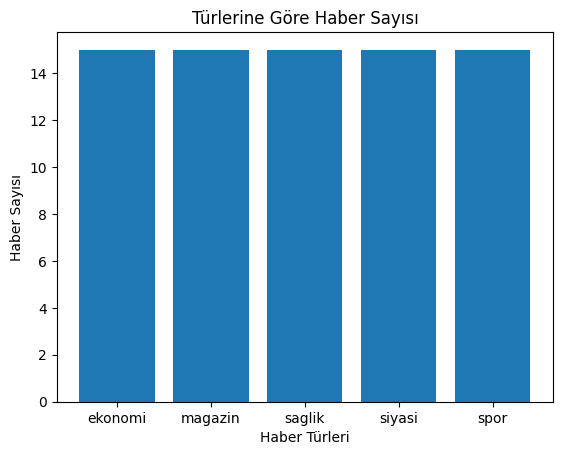

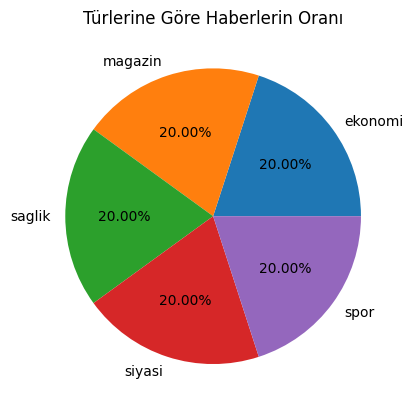

Ekonomi türünde 15 haber. 
Magazin türünde 15 haber. 
Saglik türünde 15 haber. 
Siyasi türünde 15 haber. 
Spor türünde 15 haber. 


In [4]:
plt.bar(haber_turleri, haber_sayisi)
plt.title("Türlerine Göre Haber Sayısı")
plt.xlabel("Haber Türleri")
plt.ylabel("Haber Sayısı")
plt.show()

plt.pie(haber_sayisi, labels=haber_turleri, autopct="%.2f%%")
plt.title("Türlerine Göre Haberlerin Oranı")
plt.show()


for tur, sayi in zip(haber_turleri, haber_sayisi):
    print("{} türünde {} haber. " .format(tur.capitalize(), sayi))

Ekonomi haberleri türünde ortalama kelime sayısı: 257.0
Magazin haberleri türünde ortalama kelime sayısı: 210.13333333333333
Saglik haberleri türünde ortalama kelime sayısı: 250.06666666666666
Siyasi haberleri türünde ortalama kelime sayısı: 191.4
Spor haberleri türünde ortalama kelime sayısı: 168.33333333333334


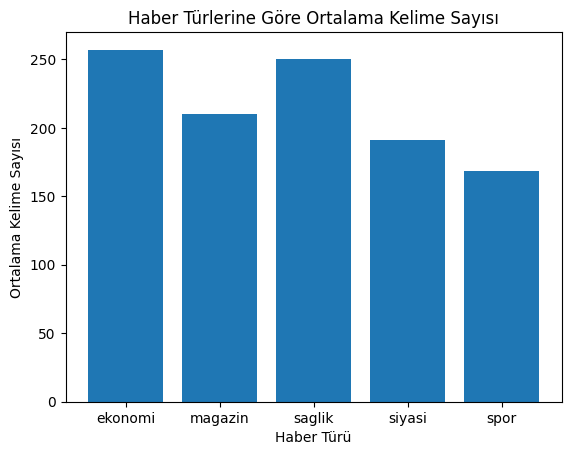

In [5]:
# Her haber türündeki ortalama kelime sayısı
ortalama_kelime_sayisi = []

for kategori in haber_turleri:
  toplam_kelime_sayisi = 0
  for dosya in os.listdir(os.path.join(kategori)):
    with open(os.path.join(kategori, dosya), "r") as f:
      icerik = f.read()
      kelime_sayisi = len(icerik.split())
      toplam_kelime_sayisi += kelime_sayisi

  ortalama_kelime = toplam_kelime_sayisi / len(os.listdir(os.path.join(kategori)))
  ortalama_kelime_sayisi.append(ortalama_kelime)

  # Ortalama kelime sayısını metin olarak yazdır
  print("{} haberleri türünde ortalama kelime sayısı: {}".format(kategori.capitalize(), ortalama_kelime))


# Görselleştirme
plt.bar(haber_turleri, ortalama_kelime_sayisi)
plt.title("Haber Türlerine Göre Ortalama Kelime Sayısı")
plt.xlabel("Haber Türü")
plt.ylabel("Ortalama Kelime Sayısı")
plt.show()
    

Ekonomi haberleri türünde ortalama cümle sayısı: 16.733333333333334
Magazin haberleri türünde ortalama cümle sayısı: 15.466666666666667
Saglik haberleri türünde ortalama cümle sayısı: 15.6
Siyasi haberleri türünde ortalama cümle sayısı: 12.933333333333334
Spor haberleri türünde ortalama cümle sayısı: 11.8


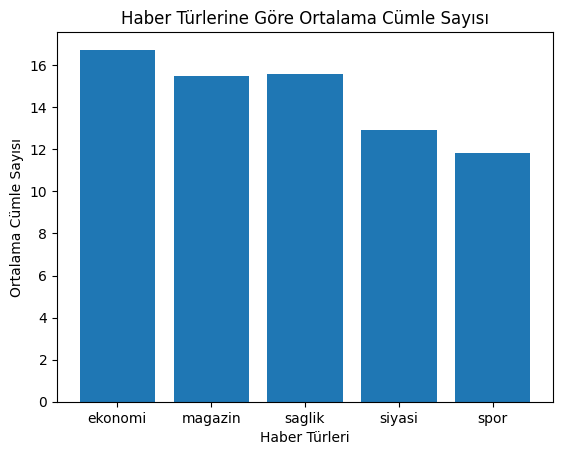

In [6]:
ortalama_cümle_sayisi = []

for kategori in haber_turleri:
    toplam_cümle_sayisi = 0
    for dosya in os.listdir(os.path.join(kategori)):
        with open(os.path.join(kategori, dosya), "r") as f:
            icerik = f.read()
            cümle_sayisi = len(re.findall(r"\.\s", icerik)) + 1  # +1 son cümleyi eklemek için
            toplam_cümle_sayisi += cümle_sayisi

    ortalama_cümle = toplam_cümle_sayisi / len(os.listdir(os.path.join(kategori)))
    ortalama_cümle_sayisi.append(ortalama_cümle)

    print("{} haberleri türünde ortalama cümle sayısı: {}".format(kategori.capitalize(), ortalama_cümle))

# Görselleştirme
plt.bar(haber_turleri, ortalama_cümle_sayisi)
plt.xlabel('Haber Türleri')
plt.ylabel('Ortalama Cümle Sayısı')
plt.title('Haber Türlerine Göre Ortalama Cümle Sayısı')
plt.show()


## ECLAT UYGULAMA

# Genel Haberler

In [7]:
genel_list= [] 

In [8]:
for klasor in haber_turleri:
    klasor_yolu = os.path.join(os.getcwd(), klasor)
    dosya_isimleri = os.listdir(klasor_yolu)

    for dosya_ismi in dosya_isimleri:
        dosya_yolu = os.path.join(klasor_yolu, dosya_ismi)
        
        with open(dosya_yolu, "r") as f:
            kelimeler = f.read().lower().split()
            kelimeler = [kelime.strip(string.punctuation) for kelime in kelimeler]
             # Belirli kelimeleri filtrele
            kelimeler = [kelime for kelime in kelimeler if kelime not in ["ve", "da","de", "ile", "bir","için", "bu", " ", ""]]
            genel_list.append(kelimeler)

In [9]:
genel_data = pd.DataFrame(genel_list)
genel_data

,0,1,2,3,4,5,6,7,8,9,...,512,513,514,515,516,517,518,519,520,521
0,fener,cumhuriyeti'nin,geliri,borcunun,iki,katı,fenerbahçe,başkanı,aziz,yıldırım,...,None,None,None,None,None,None,None,None,None,None
1,imf'den,türkiye'ye,üç,muafiyet,imf,altıncı,gözden,geçirmenin,tamamlanmasıyla,502,...,None,None,None,None,None,None,None,None,None,None
2,muhatap,biz,değiliz,demirbank'ı,2001'de,satın,alan,hsbc,bank,ortaya,...,None,None,None,None,None,None,None,None,None,None
3,bddk,köşeye,sıkıştı,danıştay,dava,daireleri,genel,kurulu,demirbank'a,el,...,None,None,None,None,None,None,None,None,None,None
4,bddk,spk,suçlu,erdoğan,i̇mar,bankası'nın,hayali,bonoları,bddk,spk'nın,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,en,büyük,boca,juniors,futbolda,yıl,42.'si,düzenlenen,kıtalararası,kupa'yı,...,None,None,None,None,None,None,None,None,None,None
71,rize,işi,uzatmadı,2-3,karadeniz,ekibi,elazığ,deplasmanında,iki,kez,...,None,None,None,None,None,None,None,None,None,None
72,gümüş,timsah,0-1,ligde,kötü,günler,geçiren,bursa,a,kategorisi'nde,...,None,None,None,None,None,None,None,None,None,None
73,konya,son,nefeste3-2,malatya,beraberliğinden,sonra,kriz,yaşayan,yeşil-beyazlı,takım,...,None,None,None,None,None,None,None,None,None,None


In [10]:
genel_eclat = ECLAT(data=genel_data)

In [11]:
genel_rule_indicies_2, genel_rule_supports_2 = genel_eclat.fit ( min_support= 0.22,
                                                                min_combination=2,
                                                                max_combination=2)

Combination 2 by 2


253it [00:20, 12.41it/s]


In [12]:
print("Tüm haber sınıflarında beraber en sık kullanılan 2 kelime: ", genel_rule_supports_2)

Tüm haber sınıflarında beraber en sık kullanılan 2 kelime:  {'söyledi & dedi': 0.22666666666666666, 'olan & olarak': 0.22666666666666666, 'gibi & olarak': 0.22666666666666666}


In [13]:
genel_rule_indicies_3, genel_rule_supports_3 = genel_eclat.fit ( min_support= 0.16,
                                                                min_combination=3,
                                                                max_combination=3)

Combination 3 by 3


41664it [55:53, 12.42it/s]


In [14]:
print("Tüm haber sınıflarında beraber en sık kullanılan 3 kelime: ", genel_rule_supports_3)

Tüm haber sınıflarında beraber en sık kullanılan 3 kelime:  {'diye & dedi & konuştu': 0.16, 'daha & gibi & olarak': 0.16, 'olan & gibi & olarak': 0.16}


# Ekonomi Haberleri

In [15]:
ekonomi_list= []

In [16]:
for klasor in ["ekonomi"]:
    klasor_yolu = os.path.join(os.getcwd(), klasor)
    dosya_isimleri = os.listdir(klasor_yolu)

    for dosya_ismi in dosya_isimleri:
        dosya_yolu = os.path.join(klasor_yolu, dosya_ismi)
        
        with open(dosya_yolu, "r") as f:
            kelimeler = f.read().lower().split()
            kelimeler = [kelime.strip(string.punctuation) for kelime in kelimeler]
             # Belirli kelimeleri filtrele
            kelimeler = [kelime for kelime in kelimeler if kelime not in ["ve", "da","de", "ile", "bir","için", "bu", " ", ""]]
            ekonomi_list.append(kelimeler)

In [17]:
ekonomi_data = pd.DataFrame(ekonomi_list)
ekonomi_data

,0,1,2,3,4,5,6,7,8,9,...,405,406,407,408,409,410,411,412,413,414
0,fener,cumhuriyeti'nin,geliri,borcunun,iki,katı,fenerbahçe,başkanı,aziz,yıldırım,...,olmaz,dedim,o,akşam,o,ayın,en,yüksek,cirosunu,yapmışız
1,imf'den,türkiye'ye,üç,muafiyet,imf,altıncı,gözden,geçirmenin,tamamlanmasıyla,502,...,None,None,None,None,None,None,None,None,None,None
2,muhatap,biz,değiliz,demirbank'ı,2001'de,satın,alan,hsbc,bank,ortaya,...,None,None,None,None,None,None,None,None,None,None
3,bddk,köşeye,sıkıştı,danıştay,dava,daireleri,genel,kurulu,demirbank'a,el,...,None,None,None,None,None,None,None,None,None,None
4,bddk,spk,suçlu,erdoğan,i̇mar,bankası'nın,hayali,bonoları,bddk,spk'nın,...,None,None,None,None,None,None,None,None,None,None
5,bilirkişi,raporu,yargıtay'dan,döndü,yargıtay,interbank'ın,içini,1.2,milyar,dolar,...,None,None,None,None,None,None,None,None,None,None
6,yatirim,fonlari,bono,bireysel,5,bin,yeni,istihdam,yaratacak,bireysel,...,None,None,None,None,None,None,None,None,None,None
7,arçelik'ten,el,yakmayan,ocak,kendi,kendini,temizleyen,fırın,ankastre,ürün,...,None,None,None,None,None,None,None,None,None,None
8,i̇mar'ı,özel,ekip,inceleyecek,hükümet,i̇mar,bankası'ndaki,yolsuzlukların,neden,farkına,...,None,None,None,None,None,None,None,None,None,None
9,hayali,nema,olayı,ahmet,erhan,çeli̇k,ankara,hazine,çalışanları,tasarrufa,...,None,None,None,None,None,None,None,None,None,None


In [18]:
ekonomi_eclat = ECLAT(data=ekonomi_data)

In [19]:
ekonomi_rule_indicies_2, ekonomi_rule_supports_2 = ekonomi_eclat.fit(min_support=0.4,
                                           min_combination=2,
                                           max_combination=2) 

Combination 2 by 2


55it [00:01, 38.74it/s]


In [20]:
print("Ekonomi sınıfına ait haberlerde beraber en sık kullanılan 2 kelimeler: ", ekonomi_rule_supports_2)

Ekonomi sınıfına ait haberlerde beraber en sık kullanılan 2 kelimeler:  {'ilgili & milyon': 0.4, 'yüzde & olarak': 0.4, 'yüzde & sonra': 0.4, 'yüzde & dedi': 0.4, 'yüzde & milyon': 0.4, 'yüzde & yeni': 0.4, 'olarak & milyon': 0.4, 'sonra & dedi': 0.4, 'sonra & milyon': 0.4, 'dedi & milyon': 0.4}


In [21]:
ekonomi_rule_indicies_3, ekonomi_rule_supports_3 = ekonomi_eclat.fit (min_support = 0.33,
                                                                      min_combination =3,
                                                                      max_combination =3)

Combination 3 by 3


2024it [00:45, 44.39it/s]


In [22]:
print("Ekonomi sınıfına ait haberlerde beraber en sık kullanılan 3 kelime: ", ekonomi_rule_supports_3)

Ekonomi sınıfına ait haberlerde beraber en sık kullanılan 3 kelime:  {'yüzde & olarak & sonra': 0.3333333333333333, 'yüzde & olarak & milyon': 0.3333333333333333, 'yüzde & olarak & yeni': 0.3333333333333333, 'yüzde & sonra & dedi': 0.3333333333333333, 'yüzde & sonra & milyon': 0.3333333333333333, 'yüzde & sonra & yeni': 0.3333333333333333, 'yüzde & dedi & milyon': 0.3333333333333333, 'yüzde & yeni & şu': 0.3333333333333333, 'olarak & sonra & milyon': 0.3333333333333333, 'sonra & dedi & milyon': 0.3333333333333333}


# Magazin Haberleri

In [23]:
magazin_list = []

In [24]:
for klasor in ["magazin"]:
    klasor_yolu = os.path.join(os.getcwd(), klasor)
    dosya_isimleri = os.listdir(klasor_yolu)

    for dosya_ismi in dosya_isimleri:
        dosya_yolu = os.path.join(klasor_yolu, dosya_ismi)
        
        with open(dosya_yolu, "r") as f:
            kelimeler = f.read().lower().split()
            kelimeler = [kelime.strip(string.punctuation) for kelime in kelimeler]
             # Belirli kelimeleri filtrele
            kelimeler = [kelime for kelime in kelimeler if kelime not in ["ve", "da","de", "ile", "bir","için", "bu", " ", ""]]
            magazin_list.append(kelimeler)

In [25]:
magazin_data = pd.DataFrame(magazin_list)
magazin_data

,0,1,2,3,4,5,6,7,8,9,...,463,464,465,466,467,468,469,470,471,472
0,seki,yerine,zerrin,özer,deniz,seki'nin,ya,bayhan,ya,ben,...,None,None,None,None,None,None,None,None,None,None
1,afiş,yarışmasına,rekor,katılım,magazi̇n,servi̇si̇,yılmaz,erdoğan'ın,yazıp,yönettiği,...,None,None,None,None,None,None,None,None,None,None
2,15,levent,people,huzurlarınızda,redroom'da,eğlence,arnavutköy,kahvesi,galata'da,mavi&beyaz,...,None,None,None,None,None,None,None,None,None,None
3,yeni,ajda,ben,olacağım,üç,yıl,önce,ajda,pekkan'ın,kendisine,...,None,None,None,None,None,None,None,None,None,None
4,lale,devri,resimleri,yıllar,sonra,eve,döndü,lale,devri'nin,en,...,None,None,None,None,None,None,None,None,None,None
5,yıldızlar,sınıfı,2,kez,toplandı,türkiye,eğitim,gönüllüleri,vakfı,tarafından,...,None,None,None,None,None,None,None,None,None,None
6,mavi,gözlü,dev,bize,sinemadan,bakacak,nâzım,hikmet'in,son,18,...,None,None,None,None,None,None,None,None,None,None
7,bayhan,koruma,altına,alındı,finale,yaklaştıkça,bütün,türkiye'yi,ekran,başına,...,None,None,None,None,None,None,None,None,None,None
8,lisede,tam,inektim,abdullah,malkoç,kanal,d'nin,sevilen,dizisi,lise,...,None,None,None,None,None,None,None,None,None,None
9,asuman'a,yine,menajer,sevgili,deni̇z,altuntaş,mehmet,ali,erbil'in,eski,...,None,None,None,None,None,None,None,None,None,None


In [26]:
magazin_eclat = ECLAT(data=magazin_data)

In [27]:
magazin_rule_indicies_2, magazin_rule_supports_2 = magazin_eclat.fit(min_support=0.33,
                                           min_combination=2,
                                           max_combination=2) 

Combination 2 by 2


190it [00:04, 42.64it/s]


In [28]:
print("Magazin sınıfına ait haberlerde beraber en sık kullanılan 2 kelimeler: ", magazin_rule_supports_2)

Magazin sınıfına ait haberlerde beraber en sık kullanılan 2 kelimeler:  {'ama & yer': 0.3333333333333333, 'ama & gibi': 0.3333333333333333, 'son & çok': 0.3333333333333333, 'olan & en': 0.4, 'olan & çok': 0.3333333333333333, 'alan & en': 0.3333333333333333, 'gibi & yıl': 0.3333333333333333, 'en & kanal': 0.3333333333333333, 'en & çok': 0.4666666666666667, 'kanal & çok': 0.3333333333333333}


In [29]:
magazin_rule_indicies_3, magazin_rule_supports_3 = magazin_eclat.fit(min_support=0.33,
                                           min_combination=3,
                                           max_combination=3) 

Combination 3 by 3


1140it [00:26, 43.62it/s]


In [30]:
print("Magazin sınıfına ait haberlerde beraber en sık kullanılan 3 kelimeler: ", magazin_rule_supports_3)

Magazin sınıfına ait haberlerde beraber en sık kullanılan 3 kelimeler:  {'olan & en & çok': 0.3333333333333333, 'en & kanal & çok': 0.3333333333333333}


# Sağlık Haberleri

In [31]:
saglik_list = []

In [32]:
for klasor in ["saglik"]:
    klasor_yolu = os.path.join(os.getcwd(), klasor)
    dosya_isimleri = os.listdir(klasor_yolu)

    for dosya_ismi in dosya_isimleri:
        dosya_yolu = os.path.join(klasor_yolu, dosya_ismi)
        
        with open(dosya_yolu, "r") as f:
            kelimeler = f.read().lower().split()
            kelimeler = [kelime.strip(string.punctuation) for kelime in kelimeler]
             # Belirli kelimeleri filtrele
            kelimeler = [kelime for kelime in kelimeler if kelime not in ["ve", "da","de", "ile", "bir","için", "bu", " ", ""]]
            saglik_list.append(kelimeler)

In [33]:
saglik_data = pd.DataFrame(saglik_list)
saglik_data

,0,1,2,3,4,5,6,7,8,9,...,349,350,351,352,353,354,355,356,357,358
0,çaya,şeker,yerine,tarçın,amerikalı,bilim,adamları,yemeklere,eklenen,az,...,None,None,None,None,None,None,None,None,None,None
1,nargile,sigara,kadar,akciğerin,düşmanı,son,yıllarda,gençler,arasında,hızla,...,None,None,None,None,None,None,None,None,None,None
2,hastalıktan,değil,hareketsizlikten,kork,düzenli,fiziksel,aktivite,yapmak,kalp,beynin,...,None,None,None,None,None,None,None,None,None,None
3,nefes,darlığı,hastalık,habercisi,sık,karşılaşılan,nefes,darlığı,tıbbi,değerlendirmeyi,...,birazdan,geçer,dediğiniz,nefes,darlığı,hayatınızda,kalıcı,olabilecek,hasarlar,bırakabilir
4,soğuk,algınlığını,antibiyotik,iyileştirmiyor,uzmanlar,antibiyotik,kullanımının,soğuk,algınlığının,düzelmesine,...,yazılması,konusunda,baskı,oluşturulmaması,gerekir,None,None,None,None,None
5,depresyon,mevsimi,kiş,sonbahar,kış,aylarında,doğada,meydana,gelen,değişimler,...,None,None,None,None,None,None,None,None,None,None
6,erkekler,ağlasaydı,şiddet,kalmazdı,ağlamanın,depresyona,iyi,geldiğini,söyleyen,uzmanlar,...,None,None,None,None,None,None,None,None,None,None
7,spor,yaparken,bel,fıtığı,olmayın,uzmanlar,adale,bağlar,ısınmadan,yapılan,...,None,None,None,None,None,None,None,None,None,None
8,hem,sağlıklı,hem,ucuz,beslenin,dengeli,sağlıklı,beslenmek,yüksek,fiyatlı,...,None,None,None,None,None,None,None,None,None,None
9,burun,tıkanıklığı,deyip,geçmeyin,geniz,eti,burun,eğriliği,sinüzitin,neden,...,None,None,None,None,None,None,None,None,None,None


In [34]:
saglik_eclat = ECLAT(data=saglik_data)

In [35]:
saglik_rule_indicies_2, saglik_rule_supports_2 = saglik_eclat.fit(min_support=0.50,
                                           min_combination=2,
                                           max_combination=2)

Combination 2 by 2


66it [00:01, 45.78it/s]


In [36]:
print("Sağlık sınıfına ait haberlerde beraber en sık kullanılan 2 kelime: ", saglik_rule_supports_2)

Sağlık sınıfına ait haberlerde beraber en sık kullanılan 2 kelime:  {'prof & dr': 0.5333333333333333, 'prof & gibi': 0.5333333333333333, 'dr & üniversitesi': 0.5333333333333333, 'dr & gibi': 0.6666666666666666, 'dr & söyledi': 0.5333333333333333, 'dr & olarak': 0.6, 'dr & olduğunu': 0.5333333333333333, 'üniversitesi & gibi': 0.5333333333333333, 'gibi & olarak': 0.6, 'gibi & olduğunu': 0.5333333333333333, 'gibi & kaydetti': 0.5333333333333333}


In [37]:
saglik_rule_indicies_3, saglik_rule_supports_3 = saglik_eclat.fit(min_support=0.50,
                                           min_combination=3,
                                           max_combination=3) 

Combination 3 by 3


220it [00:04, 52.31it/s]


In [38]:
print("Sağlık sınıfına ait haberlerde beraber en sık kullanılan 3 kelime: ", saglik_rule_supports_3) 

Sağlık sınıfına ait haberlerde beraber en sık kullanılan 3 kelime:  {'prof & dr & gibi': 0.5333333333333333, 'dr & üniversitesi & gibi': 0.5333333333333333, 'dr & gibi & olarak': 0.6, 'dr & gibi & olduğunu': 0.5333333333333333}


# Siyasi Haberler

In [39]:
siyasi_list = []

In [40]:
for klasor in ["siyasi"]:
    klasor_yolu = os.path.join(os.getcwd(), klasor)
    dosya_isimleri = os.listdir(klasor_yolu)

    for dosya_ismi in dosya_isimleri:
        dosya_yolu = os.path.join(klasor_yolu, dosya_ismi)
        
        with open(dosya_yolu, "r") as f:
            kelimeler = f.read().lower().split()
            kelimeler = [kelime.strip(string.punctuation) for kelime in kelimeler]
            # Belirli kelimeleri filtrele
            kelimeler = [kelime for kelime in kelimeler if kelime not in ["ve", "da","de", "ile", "bir","için", "bu", " ", ""]]
            siyasi_list.append(kelimeler)

In [41]:
siyasi_data = pd.DataFrame(siyasi_list)
siyasi_data

,0,1,2,3,4,5,6,7,8,9,...,512,513,514,515,516,517,518,519,520,521
0,okulda,kuran,kursu,olmaz,milli,eğitim,bakanı,devlet,okullarında,kuran,...,None,None,None,None,None,None,None,None,None,None
1,başbakanlık,neyi,bekliyor,diyanet'in,iptal,ettiği,kuran,kursu,yönetmeliğinin,sekiz,...,None,None,None,None,None,None,None,None,None,None
2,i̇ran'la,eğitim,işbirliği,tartışma,yarattı,ankara,milliyet,milli,eğitim,bakanlığı'nın,...,None,None,None,None,None,None,None,None,None,None
3,akp'ye,anket,sürprizi,i̇stanbul,milliyet,akp'nin,yaptırdığı,araştırmaya,katılanlar,hükümetin,...,None,None,None,None,None,None,None,None,None,None
4,türban,eleştirisi,abd,dışişleri,bakanlığı'nın,uluslararası,dinsel,özgürlük,raporunda,türkiye,...,None,None,None,None,None,None,None,None,None,None
5,elde,var,imam,i̇stanbul'daki,dört,bombalı,saldırıyı,düzenleyen,dinci,örgütün,...,None,None,None,None,None,None,None,None,None,None
6,politika,turu,japon,ordusuna,tesis,kolaylığı,dışişleri,bakanı,abdullah,gül,...,None,None,None,None,None,None,None,None,None,None
7,taliban'ın,kaçırdığı,mühendis,artık,akp'li,i̇zmi̇r,dha,afganistan'da,taliban'ın,ay,...,None,None,None,None,None,None,None,None,None,None
8,kürtçe,yönetmeliği,ab'ye,uygun,değil,dışişleri'nden,başbakanlığa,kürtçe,yönetmeliği,avrupa,...,None,None,None,None,None,None,None,None,None,None
9,chp'nin,i̇stanbul,sürprizi,doğan,baykal,i̇stanbul,büyükşehir,adaylığı,celal,doğan'a,...,None,None,None,None,None,None,None,None,None,None


In [42]:
siyasi_eclat = ECLAT(data=siyasi_data)

In [43]:
siyasi_rule_indicies_2, siyasi_rule_supports_2 = siyasi_eclat.fit ( min_support= 0.33,
                                                                min_combination=2,
                                                                max_combination=2)

Combination 2 by 2


120it [00:02, 49.24it/s]


In [44]:
print("Siyasi haber türünde beraber en sık kullanılan 2 kelime: ", siyasi_rule_supports_2)

Siyasi haber türünde beraber en sık kullanılan 2 kelime:  {'başkanı & dedi': 0.4, 'söyledi & dedi': 0.3333333333333333}


In [45]:
siyasi_rule_indicies_3, siyasi_rule_supports_3 = siyasi_eclat.fit ( min_support= 0.25,
                                                                min_combination=3,
                                                                max_combination=3)

Combination 3 by 3


9880it [03:29, 47.13it/s]


In [46]:
print("Siyasi haber türünde beraber en sık kullanılan 3 kelime: ", siyasi_rule_supports_3)

Siyasi haber türünde beraber en sık kullanılan 3 kelime:  {'başkanı & söyledi & dedi': 0.26666666666666666, 'olan & kadar & olarak': 0.26666666666666666}


# Spor Haberleri

In [47]:
spor_list =[]

In [48]:
for klasor in ["spor"]:
    klasor_yolu = os.path.join(os.getcwd(), klasor)
    dosya_isimleri = os.listdir(klasor_yolu)

    for dosya_ismi in dosya_isimleri:
        dosya_yolu = os.path.join(klasor_yolu, dosya_ismi)
        
        with open(dosya_yolu, "r") as f:
            kelimeler = f.read().lower().split()
            kelimeler = [kelime.strip(string.punctuation) for kelime in kelimeler]
             # Belirli kelimeleri filtrele
            kelimeler = [kelime for kelime in kelimeler if kelime not in ["ve", "da","de", "ile", "bir","için", "bu", " ", ""]]
            spor_list.append(kelimeler)

In [49]:
spor_data = pd.DataFrame(spor_list)
spor_data

,0,1,2,3,4,5,6,7,8,9,...,301,302,303,304,305,306,307,308,309,310
0,trabzon'un,kupa,sefası,3-1,bordo-mavili,takım,ligdeki,başarısını,türkiye,kupası'na,...,None,None,None,None,None,None,None,None,None,None
1,avrupa,ligleri,blackburn'e,tek,kurşun,i̇ngi̇ltere,premier,ligi'nde,tugay'ın,kaptan,...,None,None,None,None,None,None,None,None,None,None
2,efes,takipte,69-59,lacivert-beyazlı,takım,avrupa,ligi'nde,altıncı,haftaya,zirvede,...,None,None,None,None,None,None,None,None,None,None
3,kings'e,nazar,değdi,nba'de,pasifik,grubu,ikincisi,sacramento,kings,deplasmanda,...,None,None,None,None,None,None,None,None,None,None
4,yeşilyurt,çeyrek,finalde,konfederasyon,kupası'nda,yeşilyurt,bayan,voleybol,takımı,3.tur,...,None,None,None,None,None,None,None,None,None,None
5,kartal,her,telden,2-1,beşiktaş,i̇kinci,lig'de,zirveyi,kovalayan,kocaeli,...,None,None,None,None,None,None,None,None,None,None
6,alex,tehlikeye,girdi,fenerbahçe'nin,gündeminde,olan,brezilyalı,cruzeiro'da,29,gol,...,None,None,None,None,None,None,None,None,None,None
7,biz,filmi,gördük,terim,bazıları,haddini,aşan,konuşmalar,yapıyor,diye,...,faruk,süren'e,baskılar,olduğu,ancak,süren'in,kabul,etmediği,ileri,sürüldü
8,sadunhan,çimi,sever,afşın,yakuboğlu,1.ayak,mektepli,grup,uygun,va,...,None,None,None,None,None,None,None,None,None,None
9,kulüplere,gözdağı,maliye,bakanı,kemal,unakıtan,yeni,vergi,düzenlemelerine,karşın,...,None,None,None,None,None,None,None,None,None,None


In [50]:
spor_eclat = ECLAT(data=spor_data)

In [51]:
spor_rule_indicies_2, spor_rule_supports_2 = spor_eclat.fit(min_support=0.25,
                                           min_combination=2,
                                           max_combination=2)

Combination 2 by 2


561it [00:11, 48.48it/s]


In [52]:
print("Spor sınıfına ait haberlerde beraber en sık kullanılan 2 kelime: ", spor_rule_supports_2) 

Spor sınıfına ait haberlerde beraber en sık kullanılan 2 kelime:  {'2 & takım': 0.26666666666666666, 'hakemler & sari': 0.26666666666666666, 'hakemler & karnesi': 0.26666666666666666, 'hakemler & 6': 0.26666666666666666, 'hakemler & 7': 0.26666666666666666, 'hakemler & maçın': 0.26666666666666666, 'sari & karnesi': 0.26666666666666666, 'sari & 6': 0.26666666666666666, 'sari & gol': 0.26666666666666666, 'sari & ancak': 0.26666666666666666, 'sari & 7': 0.26666666666666666, 'sari & maçın': 0.26666666666666666, 'üçüncü & tur': 0.26666666666666666, 'karnesi & 6': 0.26666666666666666, 'karnesi & 7': 0.26666666666666666, 'karnesi & maçın': 0.26666666666666666, '6 & 7': 0.26666666666666666, '6 & maçın': 0.26666666666666666, '6 & oldu': 0.26666666666666666, 'takımına & ekibi': 0.26666666666666666, 'gol & ancak': 0.26666666666666666, 'gol & ekibi': 0.26666666666666666, 'tura & 7': 0.26666666666666666, 'yine & takım': 0.26666666666666666, 'takım & 7': 0.26666666666666666, '7 & maçın': 0.266666666

In [53]:
spor_rule_indicies_3, spor_rule_supports_3 = spor_eclat.fit(min_support=0.25,
                                           min_combination=3,
                                           max_combination=3)

Combination 3 by 3


5984it [01:58, 50.47it/s]


In [54]:
print("Spor sınıfına ait haberlerde beraber en sık kullanılan 3 kelime: ", spor_rule_supports_3)

Spor sınıfına ait haberlerde beraber en sık kullanılan 3 kelime:  {'hakemler & sari & karnesi': 0.26666666666666666, 'hakemler & sari & 6': 0.26666666666666666, 'hakemler & sari & 7': 0.26666666666666666, 'hakemler & sari & maçın': 0.26666666666666666, 'hakemler & karnesi & 6': 0.26666666666666666, 'hakemler & karnesi & 7': 0.26666666666666666, 'hakemler & karnesi & maçın': 0.26666666666666666, 'hakemler & 6 & 7': 0.26666666666666666, 'hakemler & 6 & maçın': 0.26666666666666666, 'hakemler & 7 & maçın': 0.26666666666666666, 'sari & karnesi & 6': 0.26666666666666666, 'sari & karnesi & 7': 0.26666666666666666, 'sari & karnesi & maçın': 0.26666666666666666, 'sari & 6 & 7': 0.26666666666666666, 'sari & 6 & maçın': 0.26666666666666666, 'sari & gol & ancak': 0.26666666666666666, 'sari & 7 & maçın': 0.26666666666666666, 'karnesi & 6 & 7': 0.26666666666666666, 'karnesi & 6 & maçın': 0.26666666666666666, 'karnesi & 7 & maçın': 0.26666666666666666, '6 & 7 & maçın': 0.26666666666666666}
